<a href="https://colab.research.google.com/github/HeoYurim/Colab/blob/main/21_10_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터준비

In [36]:
import pandas as pd

In [37]:
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()

In [38]:
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [39]:
import numpy as np
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [40]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)

# 다항 특성 만들기

In [41]:
from sklearn.preprocessing import PolynomialFeatures

In [42]:
#degree = 2
poly = PolynomialFeatures()
poly.fit([[2,3]])

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [43]:
# 1(bias), 2, 3, 2**, 2*3, 3**2
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


# LinearRegression

In [44]:
poly = PolynomialFeatures(include_bias= False)

In [45]:
poly.fit(train_input)
train_poly = poly.transform(train_input)

In [46]:
print(train_poly.shape)

(42, 9)


In [47]:
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [48]:
test_poly = poly.transform(test_input)

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
print(lr.score(train_poly, train_target))

0.9903183436982124


In [52]:
print(lr.score(test_poly, test_target))

0.9714559911594132


# 더 많은 특성 만들기

In [53]:
poly = PolynomialFeatures(degree=5, include_bias=False)

In [54]:
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [55]:
print(train_poly.shape)

(42, 55)


In [56]:
lr.fit(train_poly, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
print(lr.score(train_poly, train_target))

0.9999999999991096


In [58]:
print(lr.score(test_poly, test_target))

-144.40579242335605


# 규제 전에 표준화

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
ss = StandardScaler(0)
ss.fit(train_poly)

StandardScaler(copy=0, with_mean=True, with_std=True)

In [70]:
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

# 릿지 회귀

In [71]:
from sklearn.linear_model import Ridge

In [72]:
ridge = Ridge()
ridge.fit(train_scaled, train_target)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [73]:
print(ridge.score(train_scaled, train_target))

0.9896101671037344


In [74]:
print(ridge.score(test_scaled, test_target))

0.9790693977615385


# 적절한 규제 강도 찾기

In [78]:
train_score = [ ]
test_score = [ ]

In [79]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100 ]

In [80]:
for alpha in alpha_list:
  #릿지 모델을 만듭니다
  ridge = Ridge(alpha = alpha)
  #릿지 모델을 훈련합니다
  ridge.fit(train_scaled, train_target)
  #훈련 점수와 테스트 점수를 저장합니다
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

In [82]:
import matplotlib.pyplot as plt

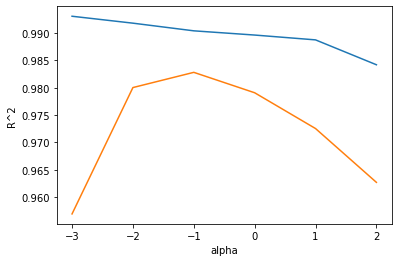

In [83]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [84]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [85]:
print(ridge.score(train_scaled, train_target))

0.9903815817570374


In [86]:
print(ridge.score(test_scaled, test_target))

0.9827976465387165


# 라쏘 회귀

In [88]:
from sklearn.linear_model import Lasso

In [90]:
lasso = Lasso()
lasso.fit(train_scaled, train_target)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [92]:
print(lasso.score(train_scaled, train_target))

0.9897898972080961


In [93]:
print(lasso.score(test_scaled, test_target))

0.9800593698421884


In [95]:
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [96]:
print(lasso.score(train_scaled, train_target))

0.9888067471131866


In [97]:
print(lasso.score(test_scaled, test_target))

0.9824470598706695


In [98]:
print(np.sum(lasso.coef_ == 0))

40


In [99]:
lasso.coef_

array([ 0.        ,  0.        ,  0.        , 12.14852453, 55.44856399,
       42.23100799,  0.        ,  0.        , 13.70596191,  0.        ,
       43.2185952 ,  5.7033775 , 47.46254536,  7.42309425, 11.85823365,
        0.        ,  0.        , 13.53038193, 21.22111356,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       18.66993032,  0.        ,  0.        ,  0.        , 15.81041778,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , 18.14672268,
        0.        ,  0.        ,  0.        ,  0.        , 15.51272953,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

# 데이터준비

In [101]:
import pandas as pd

In [102]:
fish = pd.read_csv('http://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [104]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

In [105]:
fish_target = fish['Species'].to_numpy()